<a href="https://colab.research.google.com/github/Mariam-73/Classification-of-Dogs-and-Cats-images-using-CNN/blob/master/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Import Libraries

In [20]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.utils import to_categorical
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import savez_compressed

In [28]:
def loaddata():
  # load image data
  dataset = np.load('/content/drive/My Drive/Dogs vs Cats/Dogs&cats.npz',mmap_mode='r')
  train_X = dataset['arr_0']
  train_Y = dataset['arr_1']
  return train_X, train_Y

def loaddata1():
  # load image data
  dataset = np.load('/content/drive/My Drive/Dogs vs Cats/Dogs&cats.npz',mmap_mode='r')
  test_X = dataset['arr_2']
  test_Y = dataset['arr_3']
  return test_X, test_Y

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['loss'], color='orange', label='test')
	plt.show()
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['accuracy'], color='orange', label='test')
	# save plot to file
	plt.show()
	plt.close()


## CNN Model

In [30]:
model = keras.Sequential()
model.add(layers.Conv2D(8,kernel_size=5,padding='same',activation='relu',
            input_shape=([150, 150, 1])))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(16,kernel_size=5,padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32,kernel_size=5,padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'))
model.add(layers.MaxPool2D(padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,kernel_size=5,padding='same',activation='relu'))
model.add(layers.MaxPool2D(padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 8)       208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 16)        3216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 18, 18, 32)       

#Load Test Data

In [4]:
train_X, train_Y = loaddata()

## Train

In [5]:
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_X,train_Y,epochs = 40)

Epoch 1/40
766/766 [==============================] - 7s 10ms/step - loss: 0.6860 - accuracy: 0.5413
Epoch 2/40
766/766 [==============================] - 7s 10ms/step - loss: 0.6011 - accuracy: 0.6755
Epoch 3/40
766/766 [==============================] - 7s 9ms/step - loss: 0.4947 - accuracy: 0.7608
Epoch 4/40
766/766 [==============================] - 7s 10ms/step - loss: 0.4243 - accuracy: 0.8053
Epoch 5/40
766/766 [==============================] - 7s 9ms/step - loss: 0.3840 - accuracy: 0.8262
Epoch 6/40
766/766 [==============================] - 7s 9ms/step - loss: 0.3483 - accuracy: 0.8463
Epoch 7/40
766/766 [==============================] - 7s 9ms/step - loss: 0.3143 - accuracy: 0.8624
Epoch 8/40
766/766 [==============================] - 7s 10ms/step - loss: 0.2925 - accuracy: 0.8751
Epoch 9/40
766/766 [==============================] - 7s 10ms/step - loss: 0.2759 - accuracy: 0.8822
Epoch 10/40
766/766 [==============================] - 7s 9ms/step - loss: 0.2626 - accuracy: 0

In [6]:
del train_X
del train_Y

#Load Test Data & Evaluate

In [7]:
test_X, test_Y = loaddata1()

In [10]:
loss, accuracy = model.evaluate(test_X,test_Y)
print('Accuracy:' , accuracy*100)

16/16 [==============================] - 0s 5ms/step - loss: 0.2375 - accuracy: 0.9180
Accuracy: 91.79999828338623


#Test Training/ Check Predictions

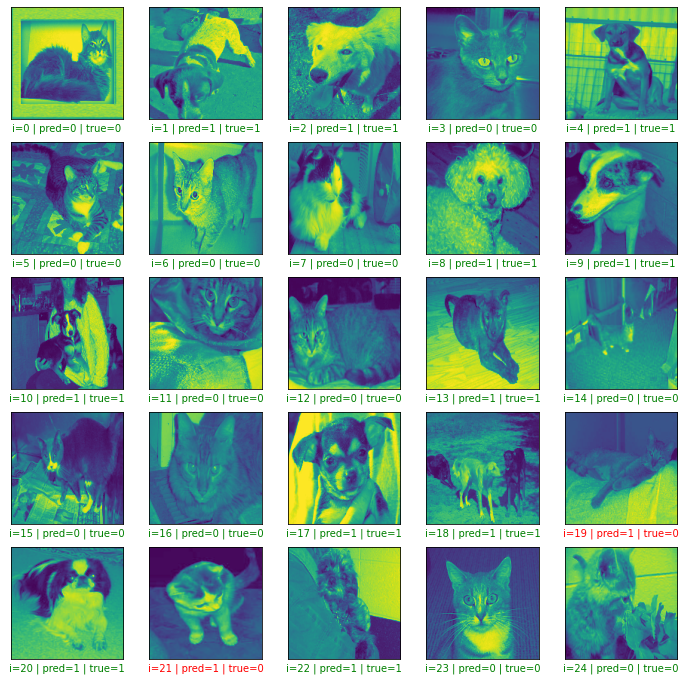

In [11]:
preds = model.predict(test_X)
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(test_Y[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(test_X[start_index + i][:,:,0])
plt.show()



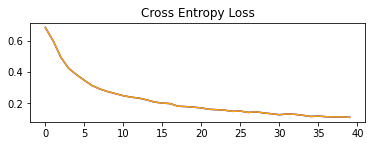

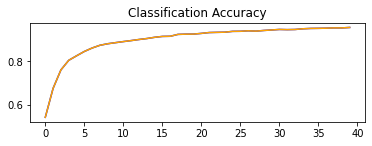

In [29]:
summarize_diagnostics(history)

In [18]:
del test_X
del test_Y